# Q11. Write a program for Creating and visualizing Neural Networks for the given data. (Use python).

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/10
25/25 [==============================] - 2s 29ms/step - loss: 0.5958 - accuracy: 0.8213 - val_loss: 0.5885 - val_accuracy: 0.8350
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 0.5807 - accuracy: 0.8388 - val_loss: 0.5723 - val_accuracy: 0.8400
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 0.5664 - accuracy: 0.8388 - val_loss: 0.5565 - val_accuracy: 0.8400
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5529 - accuracy: 0.8450 - val_loss: 0.5404 - val_accuracy: 0.8600
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 0.5392 - accuracy: 0.8450 - val_loss: 0.5256 - val_accuracy: 0.8550
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.5262 - accuracy: 0.8462 - val_loss: 0.5106 - val_accuracy: 0.8550
Epoch 7/1

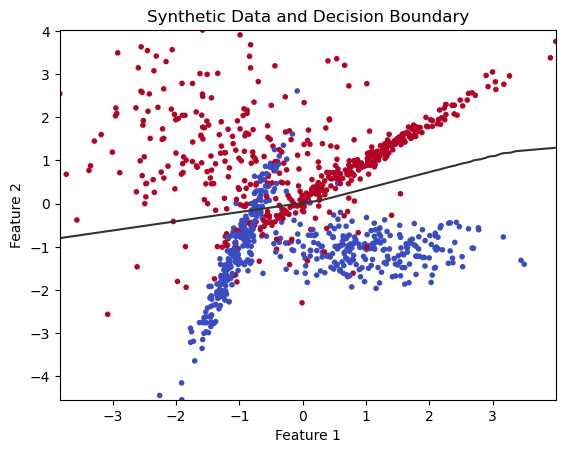

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Visualize the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='neural_network.png', show_shapes=True, show_layer_names=True)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Visualize the synthetic data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='.')
plt.title('Synthetic Data and Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Create a meshgrid to visualize decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Use the trained model to predict on the meshgrid
probs = model.predict(grid)
probs = probs.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

# Show the plot
plt.show()


# Write a program to implement ANN.

5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



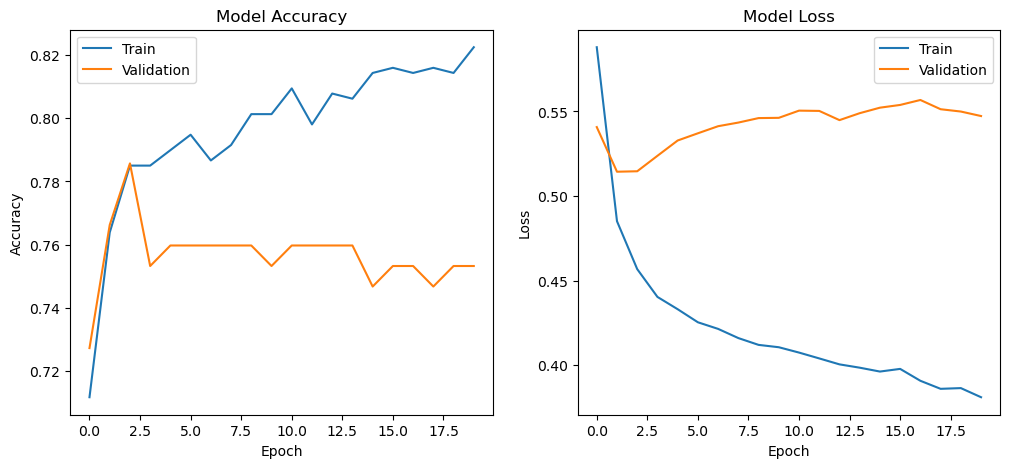

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Pima Indians Diabetes dataset
data = pd.read_csv(r"C:\Users\91997\Desktop\KRAI\diabetes.csv")

# Preprocess the data
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))

# Visualize training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Q.9 Write a program for SVM classification on any dataset.

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Breast Cancer dataset
data = pd.read_csv(r"C:\Users\91997\Desktop\KRAI\Breast Cancer Wisconsin (Diagnostic) Data Set.csv")

# Preprocess the data
X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Convert diagnosis to binary (Malignant: 1, Benign: 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the SVM model
model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.96
Confusion Matrix:
[[68  3]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# Q7. Write a program for Developing and implementing the Decision Tree model on
the dataset.

Accuracy: 0.73
Confusion Matrix:
[[67 20]
 [19 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        87
           1       0.65      0.66      0.65        56

    accuracy                           0.73       143
   macro avg       0.71      0.72      0.71       143
weighted avg       0.73      0.73      0.73       143



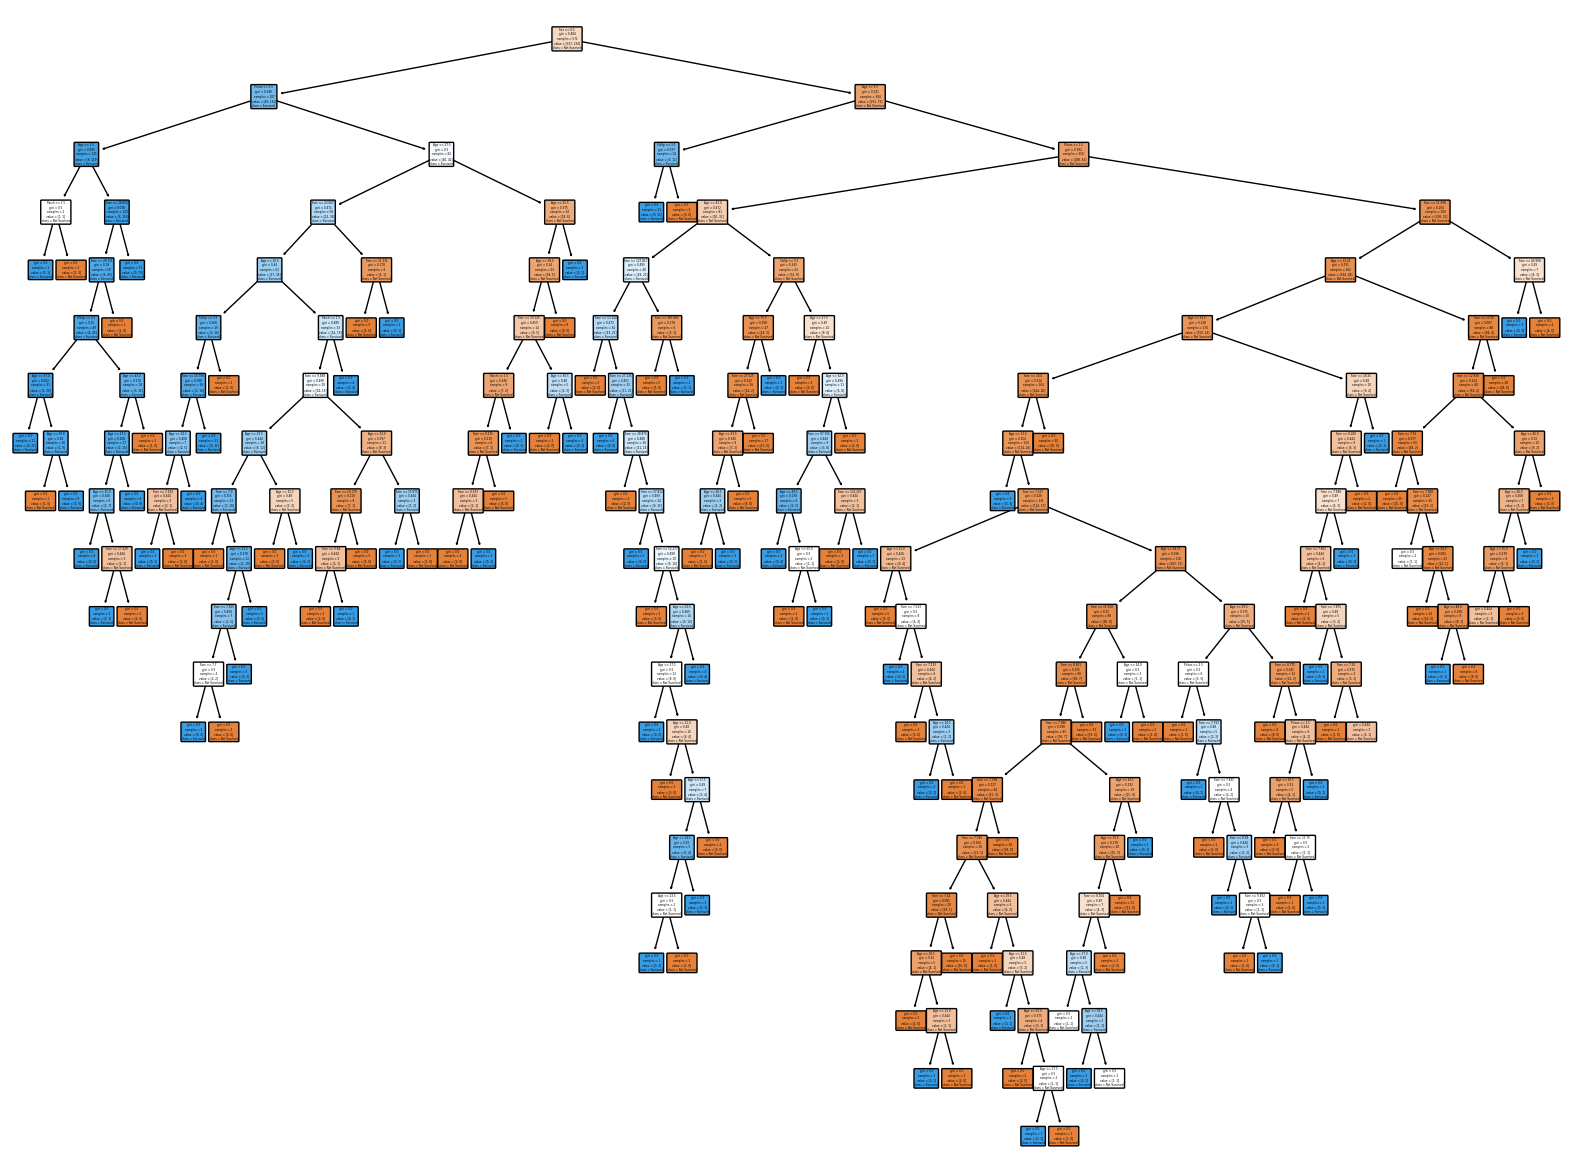

In [1]:
# Import necessary libraries
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt  # Add this import statement




# Load the Titanic dataset
data = pd.read_csv(r"C:\Users\91997\Desktop\KRAI\train.csv")

# Preprocess the data
# For simplicity, let's select a few features and handle missing values
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
data = data[selected_features].dropna()

# Convert categorical variables to numerical
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})

# Split the dataset into training and testing sets
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the Decision Tree
plt.figure(figsize=(20, 15))
tree.plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()


# Q6.Write a program to use Association algorithms for supervised classification on any dataset.

In [13]:
# Install the mlxtend library if you haven't already
# pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Groceries dataset
df = pd.read_csv(r"C:\Users\91997\Desktop\KRAI\Groceries_dataset.csv")

# Display the first few rows of the dataset
print(df.head())

# Create a binary column indicating whether the customer bought 'whole milk'
df['bought_whole_milk'] = df['itemDescription'] == 'whole milk'

# Transform data into a binary matrix using Apriori
basket = pd.pivot_table(df, index='Member_number', columns='itemDescription', values='bought_whole_milk', fill_value=False)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Extract features from association rules
df['association_feature'] = df.apply(
    lambda row: any(rule['antecedents'].issubset([row['itemDescription']]) for _, rule in rules.iterrows()),
    axis=1
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['association_feature']], df['bought_whole_milk'], test_size=0.2, random_state=42)

# Train a simple Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


C:\Users\91997\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Accuracy: 0.9361537469366696
Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97      7258
        True       0.00      0.00      0.00       495

    accuracy                           0.94      7753
   macro avg       0.47      0.50      0.48      7753
weighted avg       0.88      0.94      0.91      7753



C:\Users\91997\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91997\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91997\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


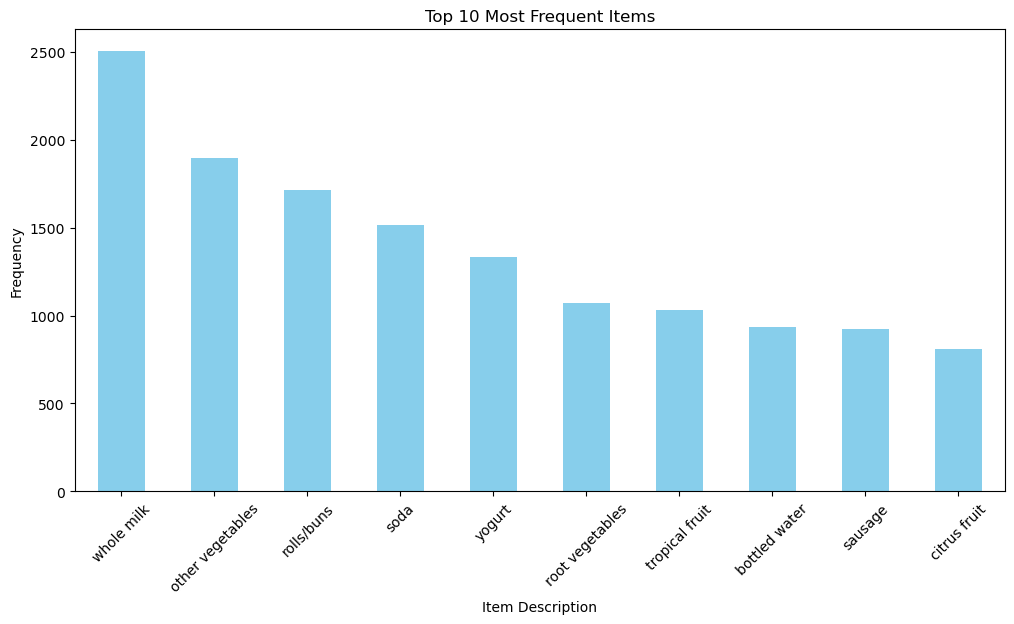

C:\Users\91997\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


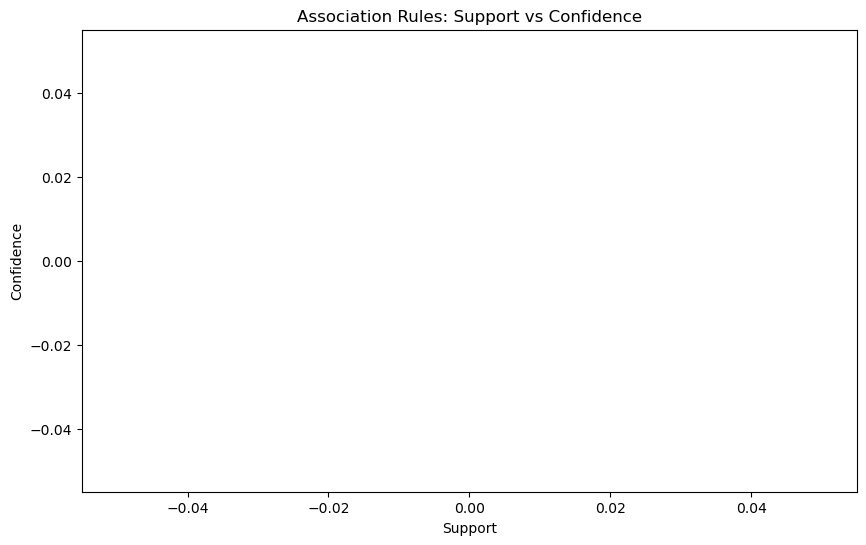

C:\Users\91997\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91997\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91997\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


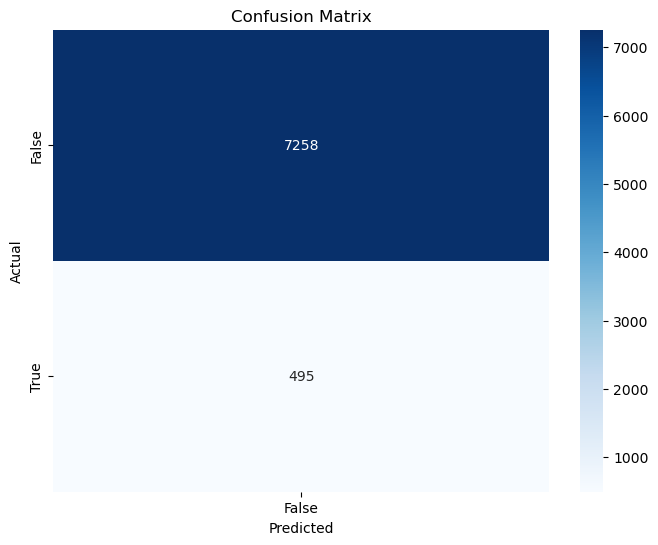

Accuracy: 0.9361537469366696
Classification Report:
               precision    recall  f1-score   support

       False       0.94      1.00      0.97      7258
        True       0.00      0.00      0.00       495

    accuracy                           0.94      7753
   macro avg       0.47      0.50      0.48      7753
weighted avg       0.88      0.94      0.91      7753



In [14]:
# Install matplotlib if you haven't already
# pip install matplotlib

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Groceries dataset
df = pd.read_csv(r"C:\Users\91997\Desktop\KRAI\Groceries_dataset.csv")

# Display the first few rows of the dataset
print(df.head())

# Create a binary column indicating whether the customer bought 'whole milk'
df['bought_whole_milk'] = df['itemDescription'] == 'whole milk'

# Visualization: Bar plot of the most frequent items
plt.figure(figsize=(12, 6))
df['itemDescription'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Items')
plt.xlabel('Item Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Transform data into a binary matrix using Apriori
basket = pd.pivot_table(df, index='Member_number', columns='itemDescription', values='bought_whole_milk', fill_value=False)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Visualization: Scatter plot of association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Extract features from association rules
df['association_feature'] = df.apply(
    lambda row: any(rule['antecedents'].issubset([row['itemDescription']]) for _, rule in rules.iterrows()),
    axis=1
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['association_feature']], df['bought_whole_milk'], test_size=0.2, random_state=42)

# Train a simple Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Visualization: Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)


# Q5 Write a program to use Clustering algorithms for unsupervised Classification.

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


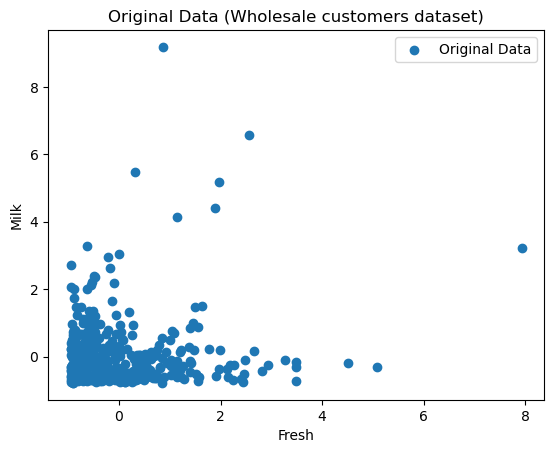

C:\Users\91997\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91997\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


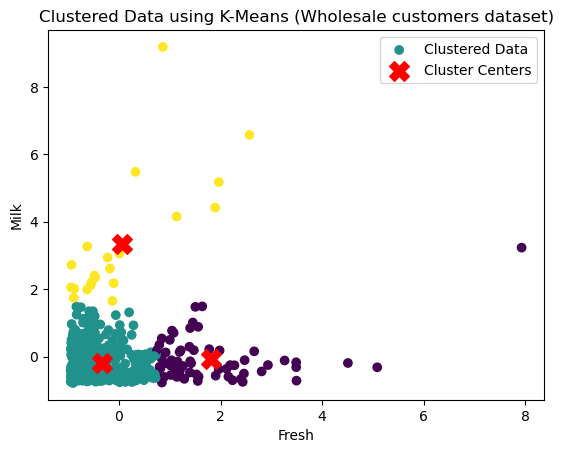

In [15]:
# Install necessary libraries if you haven't already
# pip install pandas matplotlib scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Wholesale customers dataset
df = pd.read_csv(r"C:\Users\91997\Desktop\KRAI\Wholesale customers data.csv")

# Display the first few rows of the dataset
print(df.head())

# Select features for clustering (e.g., 'Fresh' and 'Milk')
features = ['Fresh', 'Milk']

# Subset the data for visualization
df_subset = df[features]

# Standardize the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)

# Visualize the original data
plt.scatter(df_scaled[features[0]], df_scaled[features[1]], label='Original Data')
plt.title('Original Data (Wholesale customers dataset)')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clustered data
plt.scatter(df_scaled[features[0]], df_scaled[features[1]], c=df['Cluster'], cmap='viridis', label='Clustered Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Clustered Data using K-Means (Wholesale customers dataset)')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()
